In [395]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as plt

In [396]:
cab_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Cab_Data.pkl')
city_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\City.pkl')
customer_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Customer_ID.pkl')
transaction_data = p.read_pickle('C:\\Users\\cemre\\Documents\\repos\\G2M_Insight_for_Cab_Investment_Firm_Project\\Datasets\\Transaction_ID.pkl')

In [401]:
city_data = city_data.astype({'City': 'string'})
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     string
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(2), string(1)
memory usage: 608.0+ bytes


In [402]:
cab_data = cab_data.astype({'Company': 'string', 'City': 'string'})
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   Date_of_Travel  359392 non-null  object 
 2   Company         359392 non-null  string 
 3   City            359392 non-null  string 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(1), string(2)
memory usage: 19.2+ MB


In [403]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [404]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [405]:
cab_data.groupby(by='Company').groups.keys()

dict_keys(['Pink Cab', 'Yellow Cab'])

In [406]:
cab_data['Date_of_Travel'] = p.to_datetime(cab_data['Date_of_Travel'], format = '%m/%d/%Y')
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  string        
 3   City            359392 non-null  string        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(2)
memory usage: 19.2 MB


In [407]:
months = []
for i in cab_data['Date_of_Travel']:
    months.append(i.month)
cab_data['Month'] = months

In [408]:
years = []
for i in cab_data['Date_of_Travel']:
    years.append(i.year)
cab_data['Year'] = years

In [409]:
cab_data = cab_data.drop('Date_of_Travel', axis = 1)
cab_data.head()

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016

In [410]:
pink_cab = cab_data[cab_data['Company'] == 'Pink Cab']
pink_cab = pink_cab.reset_index()
pink_cab.head()

index  Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0      0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1      1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2      2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3      3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4      4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016

In [411]:
yellow_cab = cab_data[cab_data['Company'] == 'Yellow Cab']
yellow_cab = yellow_cab.reset_index()
yellow_cab.head()

index  Transaction_ID     Company        City  KM_Travelled  Price_Charged  \
0    233        10000384  Yellow Cab  ATLANTA GA         33.93        1341.17   
1    234        10000385  Yellow Cab  ATLANTA GA         42.18        1412.06   
2    235        10000386  Yellow Cab  ATLANTA GA         10.60         364.62   
3    236        10000387  Yellow Cab  ATLANTA GA         26.75         838.00   
4    237        10000388  Yellow Cab  ATLANTA GA         46.02        1540.61   

   Cost_of_Trip  Month  Year  
0      464.1624      1  2016  
1      516.2832      1  2016  
2      132.2880      1  2016  
3      333.8400      1  2016  
4      596.4192      1  2016

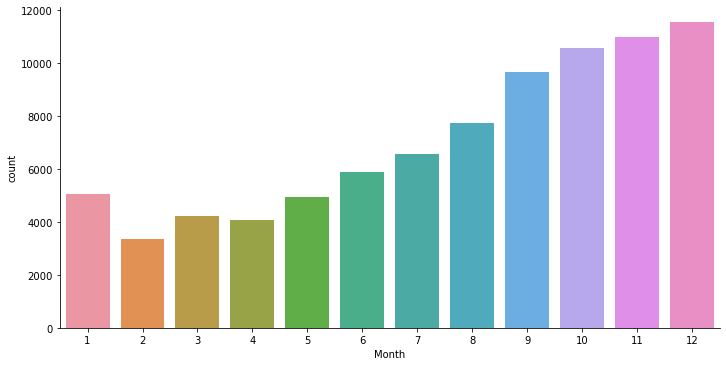

In [412]:
s.catplot(data = pink_cab, x = 'Month', kind = 'count', aspect = 2) 

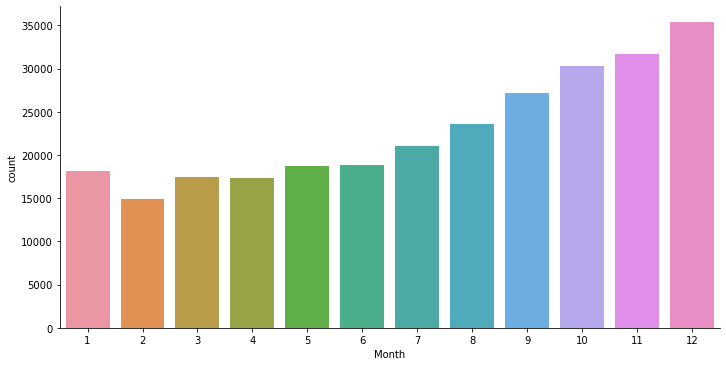

In [413]:
s.catplot(data = yellow_cab, x = 'Month', kind = 'count', aspect = 2) 

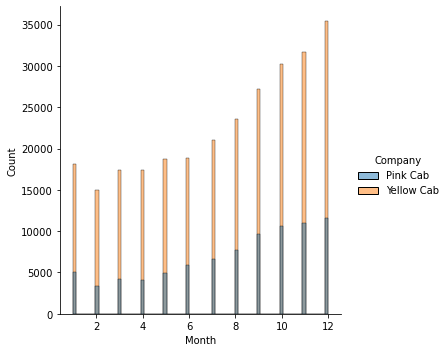

In [414]:
s.displot(data = cab_data, x = 'Month', hue = 'Company')

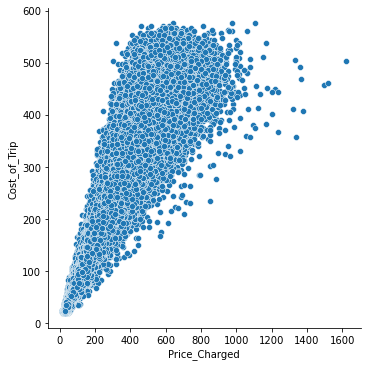

In [415]:
s.relplot(data = pink_cab, x = 'Price_Charged', y = 'Cost_of_Trip')

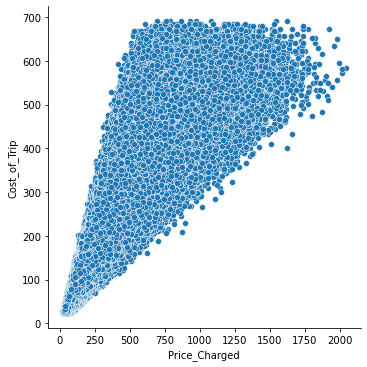

In [416]:
s.relplot(data = yellow_cab, x = 'Price_Charged', y = 'Cost_of_Trip')

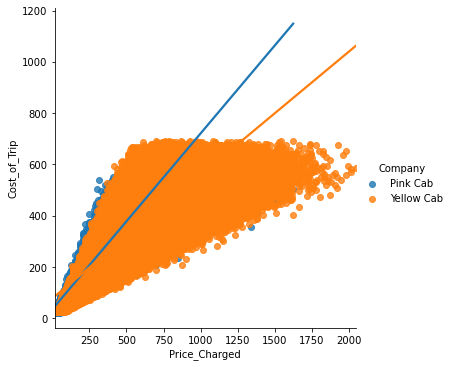

In [417]:
s.lmplot(x = 'Price_Charged', y = 'Cost_of_Trip', hue = 'Company', data = cab_data)

In [418]:
customer_merge = p.merge(transaction_data, customer_data, how = 'outer', on = 'Customer_ID')

In [419]:
customer_merge.isna().sum()

Transaction_ID        0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [420]:
customer_merge

Transaction_ID  Customer_ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
440093        10439799        12490         Cash    Male   33   
440094        10439820        14971         Card    Male   30   
440095        10439838        41414         Card    Male   38   
440096        10439840        41677         Cash    Male   23   
440097        10439846        39761         Card  Female   32   

        Income (USD/Month)  
0                    10813  
1                    10813  
2                    10813  
3                     9237  
4                     9237  
...                    ...  
440093               18713  
440094               15346  
440095                3960  
440096               19454  
440097               10128  

[440098 rows x 6 columns]

In [421]:
transaction_merge = p.merge(cab_data, customer_merge, how = 'inner', on = 'Transaction_ID')

In [422]:
transaction_merge.isna().sum()

Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Month                 0
Year                  0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [423]:
master_data = p.merge(transaction_merge, city_data, how = 'inner', on = 'City')

Text(0.5, 1.0, 'Usage of cab companies')

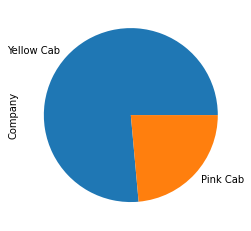

In [424]:
master_data.isna().sum()
master_data.reset_index()
master_data_count = master_data['Company'].value_counts()
master_data_count.plot(kind='pie')
ax.set_title("Usage of cab companies")

In [425]:
master_data.describe().T

count          mean            std         min  \
Transaction_ID      359392.0  1.022076e+07  126805.803715  10000011.0   
KM_Travelled        359392.0  2.256725e+01      12.233526         1.9   
Price_Charged       359392.0  4.234433e+02     274.378911        15.6   
Cost_of_Trip        359392.0  2.861901e+02     157.993661        19.0   
Month               359392.0  7.500434e+00       3.445095         1.0   
Year                359392.0  2.017045e+03       0.800239      2016.0   
Customer_ID         359392.0  1.919165e+04   21012.412463         1.0   
Age                 359392.0  3.533670e+01      12.594234        18.0   
Income (USD/Month)  359392.0  1.504882e+04    7969.409482      2000.0   

                             25%          50%           75%          max  
Transaction_ID      1.011081e+07  10221035.50  1.033094e+07  10440107.00  
KM_Travelled        1.200000e+01        22.44  3.296000e+01        48.00  
Price_Charged       2.064375e+02       386.36  5.836600e+02      2048.03  
Cost_of_Trip        1.512000e+02       282.48  4.136832e+02       691.20  
Month               5.000000e+00         8.00  1.000000e+01        12.00  
Year                2.016000e+03      2017.00  2.018000e+03      2018.00  
Customer_ID         2.705000e+03      7459.00  3.607800e+04     60000.00  
Age                 2.500000e+01        33.00  4.200000e+01        65.00  
Income (USD/Month)  8.424000e+03     14685.00  2.103500e+04     35000.00

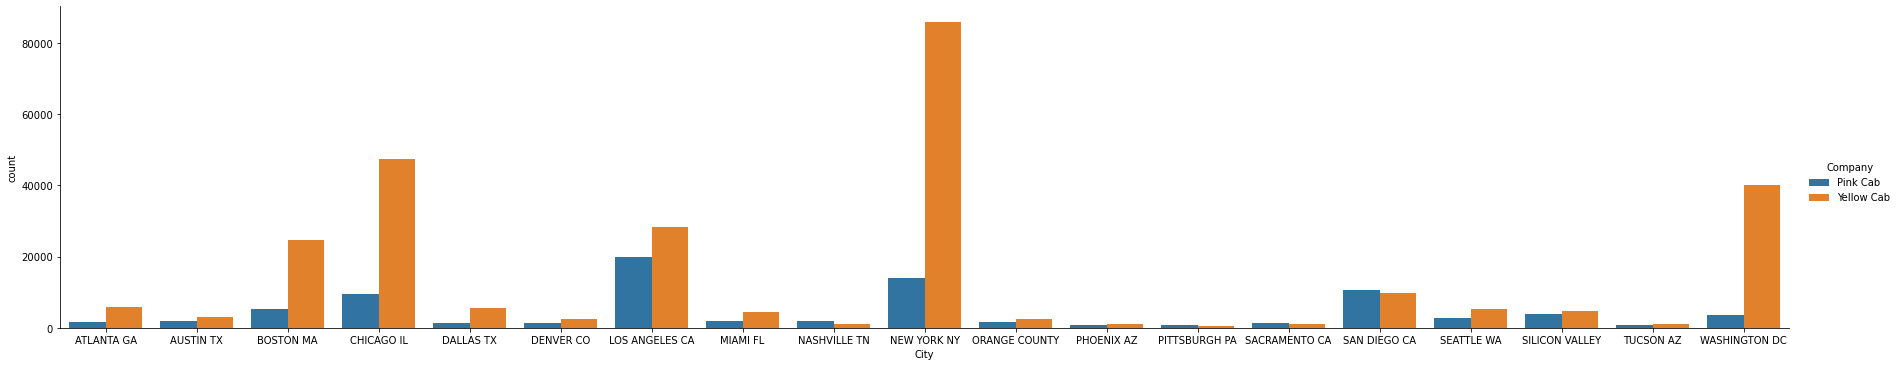

In [426]:
s.catplot(data=master_data, x='City', kind='count', hue='Company', aspect=5)

In [427]:
pink_cab_profit = pink_cab['Price_Charged'] - pink_cab['Cost_of_Trip']
pink_cab_profit.sum() / pink_cab_profit.count()

62.65217410961977

In [428]:
yellow_cab_profit = yellow_cab['Price_Charged'] - yellow_cab['Cost_of_Trip']
yellow_cab_profit
yellow_cab_profit.sum() / yellow_cab_profit.count()

160.25998584103016

In [429]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Company             359392 non-null  string 
 2   City                359392 non-null  string 
 3   KM_Travelled        359392 non-null  float64
 4   Price_Charged       359392 non-null  float64
 5   Cost_of_Trip        359392 non-null  float64
 6   Month               359392 non-null  int64  
 7   Year                359392 non-null  int64  
 8   Customer_ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Population          359392 non-null  object 
 14  Users               359392 non-null  object 
dtypes: float64(3), int64(6), object(4)